In [28]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/apratim777/apratim777/master/homeprices2.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [6]:
dummy = pd.get_dummies(df.town)
dummy

,monroe township,robinsville,west windsor
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


In [11]:
merge = pd.concat([dummy,df], axis = 1)
merge

,monroe township,robinsville,west windsor,town,area,price
0,True,False,False,monroe township,2600,550000
1,True,False,False,monroe township,3000,565000
2,True,False,False,monroe township,3200,610000
3,True,False,False,monroe township,3600,680000
4,True,False,False,monroe township,4000,725000
5,False,False,True,west windsor,2600,585000
6,False,False,True,west windsor,2800,615000
7,False,False,True,west windsor,3300,650000
8,False,False,True,west windsor,3600,710000
9,False,True,False,robinsville,2600,575000


In [14]:
x = merge.drop(['town','price','monroe township'], axis=1)
x

,robinsville,west windsor,area
0,False,False,2600
1,False,False,3000
2,False,False,3200
3,False,False,3600
4,False,False,4000
5,False,True,2600
6,False,True,2800
7,False,True,3300
8,False,True,3600
9,True,False,2600


In [19]:
reg = linear_model.LinearRegression()

reg.fit(x, df.price)

LinearRegression()

In [23]:
reg.predict([[0,0,3200]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([615848.20468716])

In [26]:
reg.score(x,df.price)

0.9573929037221873

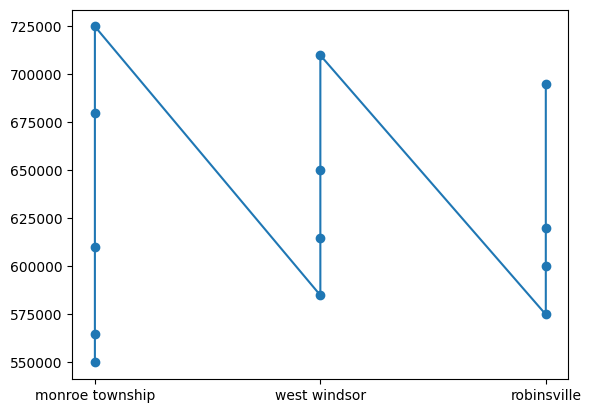

In [29]:
plt.plot(df.town, df.price)
plt.scatter(df.town, df.price)